# Baseball Data Analysis

This study investigates the [baseball dataset](http://www.seanlahman.com/baseball-archive/statistics/) and then communicate the findings about it. I use the Python libraries NumPy, Pandas, and Matplotlib to make the analysis easier. This project is a required part of Udacity Data Aanalysis Nano Degree Program.

## Database:
"The database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major"  leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 

The database is comprised of the following main tables:

  __MASTER__   -  Player names, DOB, and biographical info
  
  __Batting__  -  batting statistics
  
  __Pitching__ -  pitching statistics
  
  __Fielding__ -  fielding statistics"
  
[Sean Lahman Baseball Database](http://seanlahman.com/files/database/readme2016.txt)

## Research Questions:
   __1)__ What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
   
   __2)__ What are the characteristics of baseball players with the highest salaries?
   
   __3)__

## Analysis 

First, each data set will be analyzed seperately, and then the tables will be combined for further analysis.

In [165]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Master Table Analyses

In [3]:
master = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Master.csv")

In [4]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 24 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null object
finalGame       18910 non-null object
retroID         19049 non-null object
bbrefID        

It is clear that there exist missing values in the master dataset. There exist 24 columns and 19105 rows in the dataset. 8 columns are numeric and the remaining 16 columns are non-numeric. 

Should playerID be the index?

In [5]:
len(master["playerID"].unique())

19105

In [6]:
master = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Master.csv", index_col = 'playerID')

In [7]:
master.head()


,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [8]:
# fix datatypes converting objects to dates
master['debut']= pd.to_datetime(master['debut'])
master['finalGame']= pd.to_datetime(master['finalGame'])

In [9]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19105 entries, aardsda01 to zychto01
Data columns (total 23 columns):
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null datetime64[ns]
finalGame       18910 non-null datetime64[ns]
retroID         19049 non-null object
bbrefID         19103 non-null 

In [10]:
master.head()

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


__Question__: What is the first debut date of players? How many player were in that day?

In [11]:
sorted_master = master.sort_values(['debut'])

In [12]:
first_debut = sorted_master['debut'].min()

In [13]:
first_debut

Timestamp('1871-05-04 00:00:00')

In [14]:
first_players = master[master['debut']==first_debut]

In [15]:
first_players2 = first_players.copy()
print(len(first_players2))

18


Total number of players in the first day was __18__ !

__Question__: How long did the first players play in the league?

In [16]:
lenght_of_play = first_players2['finalGame'] - first_players2['debut']

In [17]:
lenght_of_play

playerID
allisar01   1981 days
bassjo01    2300 days
careyto01   3070 days
carleji01    384 days
foranji01    117 days
goldswa01   1502 days
kellybi01    117 days
kimbage01    146 days
lennobi01    799 days
mathebo01   6003 days
mcderjo01    429 days
minched01    419 days
paborch01   1638 days
prattal01    473 days
selmafr01   1460 days
suttoez01   6257 days
whitede01   7093 days
whiteel01    146 days
dtype: timedelta64[ns]

In [18]:
first_players2['lenght_of_play'] = lenght_of_play

In [19]:
first_players2.sort_values(['lenght_of_play'], ascending = False)

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,lenght_of_play
playerID,,,,,,,,,,,,,,,,,,,,,
whitede01,1847.0,12.0,2.0,USA,NY,Caton,1939.0,7.0,7.0,USA,...,James Laurie,175.0,71.0,L,R,1871-05-04,1890-10-04,whitd102,whitede01,7093 days
suttoez01,1849.0,9.0,17.0,USA,NY,Seneca Falls,1907.0,6.0,20.0,USA,...,Ezra Ballou,153.0,68.0,R,R,1871-05-04,1888-06-20,sutte101,suttoez01,6257 days
mathebo01,1851.0,11.0,21.0,USA,MD,Baltimore,1898.0,4.0,17.0,USA,...,Robert T.,140.0,65.0,R,R,1871-05-04,1887-10-10,mathb101,mathebo01,6003 days
careyto01,1846.0,11.0,2.0,USA,NY,Brooklyn,1906.0,8.0,16.0,USA,...,Thomas Joseph,145.0,68.0,R,R,1871-05-04,1879-09-29,caret101,careyto01,3070 days
bassjo01,1848.0,NaN,NaN,USA,MD,Charleston,1888.0,9.0,25.0,USA,...,John Elias,150.0,66.0,NaN,NaN,1871-05-04,1877-08-20,bassj101,bassjo01,2300 days
allisar01,1849.0,1.0,29.0,USA,PA,Philadelphia,1916.0,2.0,25.0,USA,...,Arthur Algernon,150.0,68.0,NaN,NaN,1871-05-04,1876-10-05,allia101,allisar01,1981 days
paborch01,1846.0,9.0,24.0,USA,NY,Brooklyn,1913.0,4.0,23.0,USA,...,Charles Henry,155.0,68.0,L,L,1871-05-04,1875-10-28,paboc101,paborch01,1638 days
goldswa01,1848.0,10.0,NaN,USA,MD,Baltimore,1915.0,9.0,16.0,USA,...,Warren M.,146.0,67.0,NaN,NaN,1871-05-04,1875-06-14,goldw101,goldswa01,1502 days
selmafr01,1851.0,1.0,21.0,USA,MD,Baltimore,1907.0,5.0,6.0,USA,...,Charles Francis,145.0,69.0,NaN,NaN,1871-05-04,1875-05-03,selmf101,selmafr01,1460 days


In [20]:
first_players2['lenght_of_play'].max()

Timedelta('7093 days 00:00:00')

The longest 'first player' played in 7093 day time interval in total.

__Question__: What is the average length of play of the players?

In [21]:
#Due to mutability issues, I have copied the master table and added a new column
master_full = master.copy()
length_of_play = master['finalGame'] - master['debut']
master_full['length_of_play'] = length_of_play

In [22]:
# number of null debut cells
len(master_full['debut'][pd.isnull(master_full['debut'])])

195

Since there exist only 195 missing debut number, I will drop them and make the analysis accordingly

In [23]:
# Drop the row if debut is missing
master_cleaned_debuts = master_full.dropna(subset =['debut'])

In [24]:
len(master_cleaned_debuts)

18910

In [25]:
master_cleaned_debuts['length_of_play'].describe()

count                        18910
mean     1761 days 21:48:15.610787
std      1832 days 17:33:00.130746
min              -4 days +00:00:00
25%              138 days 00:00:00
50%             1163 days 00:00:00
75%             2931 days 00:00:00
max            12862 days 00:00:00
Name: length_of_play, dtype: object

There seems to be problem since there exist data points where debut is later than finalGame. Let's find it.

In [26]:
master_cleaned_debuts[master_cleaned_debuts['debut'] > master_cleaned_debuts['finalGame']]

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,length_of_play
playerID,,,,,,,,,,,,,,,,,,,,,
menzete01,1897.0,11.0,4.0,USA,MO,St. Louis,1969.0,12.0,23.0,USA,...,Theodore Charles,172.0,69.0,R,R,1918-04-27,1918-04-23,menzt101,menzete01,-4 days


In [27]:
master_cleaned_debuts = master_cleaned_debuts.drop('menzete01')

In [28]:
master_cleaned_debuts['length_of_play'].describe()

count                        18909
mean     1762 days 00:02:44.493098
std      1832 days 17:37:59.704421
min                0 days 00:00:00
25%              138 days 00:00:00
50%             1163 days 00:00:00
75%             2931 days 00:00:00
max            12862 days 00:00:00
Name: length_of_play, dtype: object

In [29]:
master_cleaned_debuts[['nameGiven', 'nameLast','length_of_play']].sort_values('length_of_play',ascending = False)


,nameGiven,nameLast,length_of_play
playerID,,,
altroni01,Nicholas,Altrock,12862 days
orourji01,James Henry,O'Rourke,11836 days
minosmi01,Saturnino Orestes Armas,Minoso,11492 days
olearch01,Charles Timothy,O'Leary,11126 days
lathaar01,Walter Arlington,Latham,10678 days
mcguide01,James Thomas,McGuire,10192 days
jennihu01,Hugh Ambrose,Jennings,9954 days
eversjo01,John Joseph,Evers,9897 days
ryanno01,Lynn Nolan,Ryan,9873 days


In [30]:
len(master_cleaned_debuts[master_cleaned_debuts['length_of_play'] == '0 days'])

1009

On Average, a player played 1762 days in the league. There exist several players who appeared just once (1009). The player'Nicholas Altrock' played 12862 days, which is more than 35 years.

__Question__: What portion of players used different hands for batting and throwing?

In [31]:
master_hands = master.copy()

In [32]:
master_hands = master_hands.dropna(subset =[['bats', 'throws']])

In [33]:
# Total number of non-null batting and throwing rows
x = len(pd.isnull(master_hands[['bats', 'throws']]))

In [34]:
# Check if there exist Null cells
master_hands[master_hands['bats']=='Nan']
master_hands[master_hands['throws']=='Nan']



,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,


In [35]:
# Different hand users
y = len(master_hands[((master_hands['bats']=='R') & (master_hands['throws'] == 'L')) | 
             ((master_hands['bats']=='L') & (master_hands['throws'] == 'R'))] )


In [36]:
# Fraction of different hand users
y/x

0.14975275342773656

15% of all the players use different hands for throwing and batting

### Salary Table Analysis

In [133]:
salary = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Salaries.csv", index_col ='playerID')


In [134]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26428 entries, barkele01 to zimmery01
Data columns (total 4 columns):
yearID    26428 non-null int64
teamID    26428 non-null object
lgID      26428 non-null object
salary    26428 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [135]:
salary.head()

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000


In [136]:
salary.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [137]:
# Is there any missing data?
salary.isnull().any()

yearID    False
teamID    False
lgID      False
salary    False
dtype: bool

There exist no missing data in salary table.

In [138]:
# Lets check the extreme salaries 
salary.sort_values('salary').head(10)

,yearID,teamID,lgID,salary
playerID,,,,
jamesdi01,1993,NYA,AL,0
martija02,1999,PIT,NL,0
silveda01,1993,NYA,AL,10900
carych01,1994,CHA,AL,50000
penaal01,1997,FLO,NL,50000
cluttbr01,1986,ML4,AL,60000
loyndmi01,1986,TEX,AL,60000
soffra01,1986,SLN,NL,60000
mathegr01,1986,SLN,NL,60000


In [146]:
salary.sort_values('salary', ascending =False).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
kershcl01,2016,LAD,NL,33000000
rodrial01,2009,NYA,AL,33000000
rodrial01,2010,NYA,AL,33000000
kershcl01,2015,LAN,NL,32571000
rodrial01,2011,NYA,AL,32000000
greinza01,2016,ARI,NL,31799030
priceda01,2016,BOS,AL,30000000
rodrial01,2012,NYA,AL,30000000
rodrial01,2013,NYA,AL,29000000


There seems to be a problem. Two players have 0 salary. Let's drop them

In [140]:
salary_cleaned = salary.drop(['jamesdi01', 'martija02'])

In [141]:
salary_cleaned.sort_values('salary').head(10)

,yearID,teamID,lgID,salary
playerID,,,,
silveda01,1993,NYA,AL,10900
penaal01,1997,FLO,NL,50000
carych01,1994,CHA,AL,50000
stewada01,1986,OAK,AL,60000
spilmha01,1986,DET,AL,60000
slatoji01,1986,DET,AL,60000
kinger01,1986,DET,AL,60000
yettri01,1986,CLE,AL,60000
birtsti01,1985,OAK,AL,60000


In [147]:
salary_cleaned.sort_values('salary', ascending = False).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
rodrial01,2009,NYA,AL,33000000
kershcl01,2016,LAD,NL,33000000
rodrial01,2010,NYA,AL,33000000
kershcl01,2015,LAN,NL,32571000
rodrial01,2011,NYA,AL,32000000
greinza01,2016,ARI,NL,31799030
rodrial01,2012,NYA,AL,30000000
priceda01,2016,BOS,AL,30000000
rodrial01,2013,NYA,AL,29000000


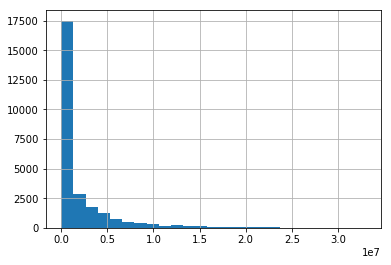

In [150]:
salary_cleaned['salary'].hist(bins=25)

It seems salary comparison for a 30-year of period needs inflation adjustment. Let's investigate last 3 years.

__Question__: What is the yearly average salary of the players?

In [153]:
sorted_annual_average_salaries = salary_cleaned.groupby('yearID').mean().sort_values('salary', ascending=False)

In [154]:
sorted_annual_average_salaries.head()


,salary
yearID,
2016,4.396410e+06
2015,4.301276e+06
2014,3.980446e+06
2013,3.723344e+06
2012,3.458421e+06


In the last 5 years, average salaries passed 3.4 million USD

__Question__ : What is the salary distribution for the last 3 years?

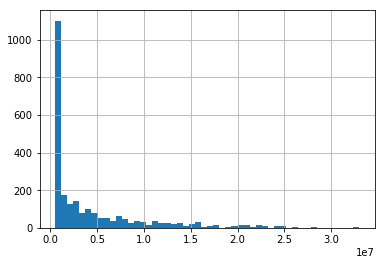

In [160]:
salary_cleaned[salary_cleaned['yearID'] > 2013]['salary'].hist(bins = 50)

It seems that, for the last 3 years, most players earned less than half million. 
However, there exis few players who earn more than 2.5 million.
If we look at the top 10 salaries and the lowest 10 salaries, we will have a better idea about salary distribution.

In [161]:
salary_cleaned[salary_cleaned['yearID'] > 2013].sort_values('salary', ascending =False).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
kershcl01,2016,LAD,NL,33000000
kershcl01,2015,LAN,NL,32571000
greinza01,2016,ARI,NL,31799030
priceda01,2016,BOS,AL,30000000
cabremi01,2016,DET,AL,28000000
verlaju01,2016,DET,AL,28000000
verlaju01,2015,DET,AL,28000000
cespeyo01,2016,NYM,NL,27328046
greinza01,2014,LAN,NL,26000000


In [162]:
salary_cleaned[salary_cleaned['yearID'] > 2013].sort_values('salary', ascending =True).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
hamilbi02,2014,CIN,NL,500000
johnser04,2014,CHA,AL,500000
wheelry01,2014,COL,NL,500000
herreel01,2014,MIL,NL,500000
herrmch01,2014,MIN,AL,500000
donaljo02,2014,OAK,AL,500000
rufda01,2014,PHI,NL,500000
handbr01,2014,MIA,NL,500000
ascheco01,2014,PHI,NL,500000


In [163]:
salary_cleaned[salary_cleaned['yearID'] > 2013].describe()

,yearID,salary
count,2472.000000,2.472000e+03
mean,2015.020631,4.230015e+06
std,0.818134,5.537272e+06
min,2014.000000,5.000000e+05
25%,2014.000000,5.186500e+05
50%,2015.000000,1.550000e+06
75%,2016.000000,5.700000e+06
max,2016.000000,3.300000e+07


In [164]:
salary_cleaned[salary_cleaned['yearID'] > 2013].median()

yearID       2015.0
salary    1550000.0
dtype: float64

Although the median salary in the last 3 years is 1.55 million, due to extreme earners, 
mean is 4.23 million dollars. Therefore, the distribution of salaries is positively skewed.

__Question__: What are the characteristics of baseball players with the highest salaries?


Without the inflation and other extranous factors, it is difficult to compare the salaries of different players. However, we may investigate the players with the highest income and the players with the lowest income of each year and compare their characteristics. First, I will normalize the salaries.

In [197]:
salary_cleaned_copy = salary_cleaned.copy()

In [198]:
yearly_salary_mean= salary_cleaned.groupby('yearID').mean()

In [199]:
yearly_salary_std = salary_cleaned.groupby('yearID').std()

In [200]:
merged_mean_std =yearly_salary_mean.merge(yearly_salary_std, left_index =True, right_index = True )

In [201]:
merged_salary = pd.merge(salary_cleaned_copy, merged_mean_std, right_index =True, left_on ='yearID')

In [206]:
merged_salary.head()

,yearID,teamID,lgID,salary,salary_x,salary_y
playerID,,,,,,
barkele01,1985,ATL,NL,870000,476299.447273,343320.889498
bedrost01,1985,ATL,NL,550000,476299.447273,343320.889498
benedbr01,1985,ATL,NL,545000,476299.447273,343320.889498
campri01,1985,ATL,NL,633333,476299.447273,343320.889498
ceronri01,1985,ATL,NL,625000,476299.447273,343320.889498


In [209]:
merged_salary.rename(columns={'salary_x': 'annual_salary_mean', 'salary_y': 'annual_salary_std' }, inplace=True)


In [210]:
merged_salary

,yearID,teamID,lgID,salary,annual_salary_mean,annual_salary_std
playerID,,,,,,
barkele01,1985,ATL,NL,870000,4.762994e+05,3.433209e+05
bedrost01,1985,ATL,NL,550000,4.762994e+05,3.433209e+05
benedbr01,1985,ATL,NL,545000,4.762994e+05,3.433209e+05
campri01,1985,ATL,NL,633333,4.762994e+05,3.433209e+05
ceronri01,1985,ATL,NL,625000,4.762994e+05,3.433209e+05
chambch01,1985,ATL,NL,800000,4.762994e+05,3.433209e+05
dedmoje01,1985,ATL,NL,150000,4.762994e+05,3.433209e+05
forstte01,1985,ATL,NL,483333,4.762994e+05,3.433209e+05
garbege01,1985,ATL,NL,772000,4.762994e+05,3.433209e+05


In [211]:
merged_salary_copy = merged_salary.copy()

In [213]:
normalized_salary = (merged_salary['salary']-merged_salary['annual_salary_mean'])/merged_salary['annual_salary_std']

In [214]:
merged_salary_copy['normalized_salary'] = normalized_salary

In [215]:
merged_salary_copy

,yearID,teamID,lgID,salary,annual_salary_mean,annual_salary_std,normalized_salary
playerID,,,,,,,
barkele01,1985,ATL,NL,870000,4.762994e+05,3.433209e+05,1.146742
bedrost01,1985,ATL,NL,550000,4.762994e+05,3.433209e+05,0.214670
benedbr01,1985,ATL,NL,545000,4.762994e+05,3.433209e+05,0.200106
campri01,1985,ATL,NL,633333,4.762994e+05,3.433209e+05,0.457396
ceronri01,1985,ATL,NL,625000,4.762994e+05,3.433209e+05,0.433124
chambch01,1985,ATL,NL,800000,4.762994e+05,3.433209e+05,0.942851
dedmoje01,1985,ATL,NL,150000,4.762994e+05,3.433209e+05,-0.950421
forstte01,1985,ATL,NL,483333,4.762994e+05,3.433209e+05,0.020487
garbege01,1985,ATL,NL,772000,4.762994e+05,3.433209e+05,0.861295


Now, we can choose players with 2 sd salaries

In [229]:
merged_salary_copy[merged_salary_copy['normalized_salary'] > 6]

,yearID,teamID,lgID,salary,annual_salary_mean,annual_salary_std,normalized_salary
playerID,,,,,,,
fostege01,1986,NYN,NL,2800000,4.171470e+05,3.940176e+05,6.047580
sheffga01,1998,FLO,NL,14936667,1.281959e+06,1.823839e+06,7.486794
rodrial01,2001,TEX,AL,22000000,2.279841e+06,2.907710e+06,6.782023
rodrial01,2002,TEX,AL,22000000,2.392527e+06,3.070387e+06,6.385994
rodrial01,2005,NYA,AL,26000000,2.633831e+06,3.631631e+06,6.434070
rodrial01,2009,NYA,AL,33000000,3.277647e+06,4.371688e+06,6.798828
rodrial01,2010,NYA,AL,33000000,3.278747e+06,4.461190e+06,6.662180
rodrial01,2011,NYA,AL,32000000,3.318838e+06,4.541140e+06,6.315850
